In [101]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift
from scipy.optimize import curve_fit

In [102]:
def extractData(filename):
    prefix = "ugastro\\Lab1Data\\Section5_2\\"
    raw_data = np.load(prefix + filename)
    return windowData(removeBuffer(raw_data['time_data']))


def removeBuffer(data):
    return data[2:3][0]

def windowData(data):
    return data[1000:1100]

In [103]:
data_480_900 = extractData("lab_1_data_480khz_900khz.npz")
data_480_950 = extractData("lab_1_data_480khz_900khz.npz")
data_480_1000 = extractData("lab_1_data_480khz_1000khz.npz")
data_480_1300 = extractData("lab_1_data_480khz_1300khz.npz")
data_480_2000 = extractData("lab_1_data_480khz_2000khz.npz")
data_480_3000 = extractData("lab_1_data_480khz_3000khz.npz")
data_480_3100 = extractData("lab_1_data_480khz_1000khz.npz")

data_480_1000_offset = extractData("lab_1_data_480khz_1000khz_offset.npz")
data_480_1300_offset = extractData("lab_1_data_480khz_1300khz_offset.npz")
data_480_2000_offset = extractData("lab_1_data_480khz_2000khz_offset.npz")
data_480_3000_offset = extractData("lab_1_data_480khz_3000khz_offset.npz")
data_480_3100_offset = extractData("lab_1_data_480khz_1000khz_offset.npz")

indices = windowData([i for i in range(0, 2048)])

In [104]:
def printDataBlocks(dataset):
    n = len(dataset)
    fig, axs = plt.subplots(1, n, figsize=(18, 6))

    for i in range(0, n):
        axs[i].plot(indices, data_480_1000[i])
        axs[i].set_xlabel("Time / Samples")
        axs[i].set_ylabel("Measured Voltage")

    plt.tight_layout()
    plt.show()

In [105]:
def graphAllTimeData(datasets, labels, signal):
    n = len(datasets)
    fig, axs = plt.subplots(1, n, figsize=(18, 6))

    for i, data in enumerate(datasets):
        axs[i].plot(indices, data, label=labels[i], alpha=1)
        axs[i].scatter(indices, data, alpha=1)
        axs[i].legend()
        axs[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.xlabel("Time / Samples")
    plt.ylabel("Measured Voltage")
    plt.title(f"Analysis of {signal} Signal w/ Different Sample Rates", size=20)
    plt.show()

In [111]:
def graphOverlayTimeData(datasets, labels, signal):
    plt.figure(figsize=(12,8))

    for i, data in enumerate(datasets):
        plt.plot(indices, data, label=labels[i], alpha=1)
        plt.scatter(indices, data, s=10)

    plt.xlabel("Time / Samples")
    plt.ylabel("Measured Voltage")
    plt.title(f"Analysis of {signal} Signal w/ Different Sample Rates", size=20)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [107]:
def sine_func(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

def graphAllTimeDataWithFit(datasets, labels, signal):
    n = len(datasets)
    fig, axs = plt.subplots(1, n, figsize=(18, 6))

    for i, data in enumerate(datasets):
        indices = np.arange(len(data))
        best_fit = curve_fit(sine_func, indices, data, p0=[1, 1, 0, 0])[0]

        axs[i].plot(indices, data, label=labels[i])
        axs[i].scatter(indices, data, s=10)

        fitted_data = sine_func(indices, *best_fit)
        axs[i].plot(indices, fitted_data, label=f"{labels[i]} Fitted Sine", linestyle="--")
        
    plt.xlabel("Time / Samples")
    plt.ylabel("Measured Voltage")
    plt.title(f"Analysis of {signal} Signal w/ Different Sample Rates with Sine Fit", size=20)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

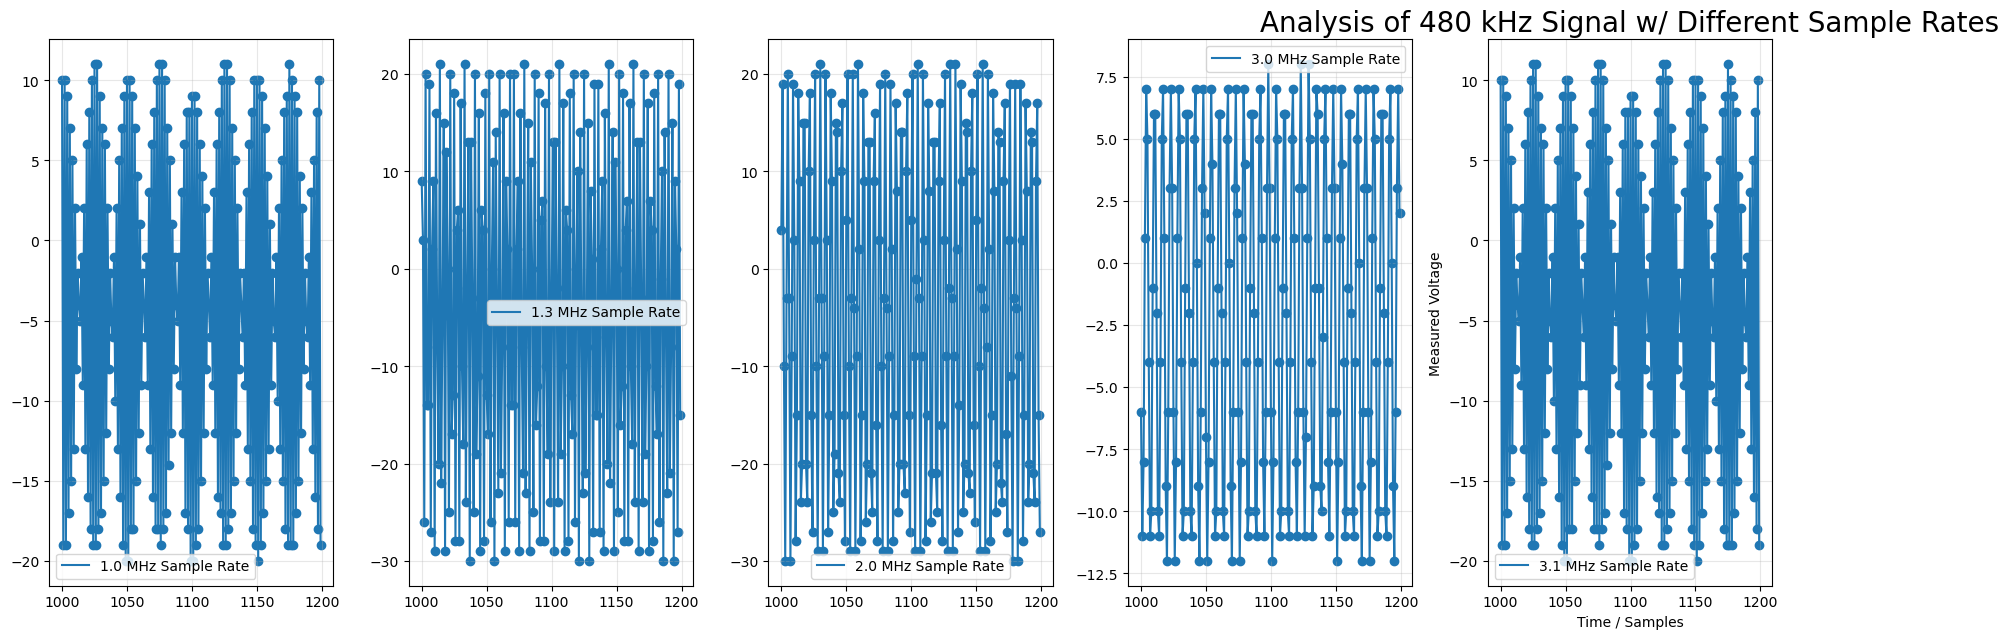

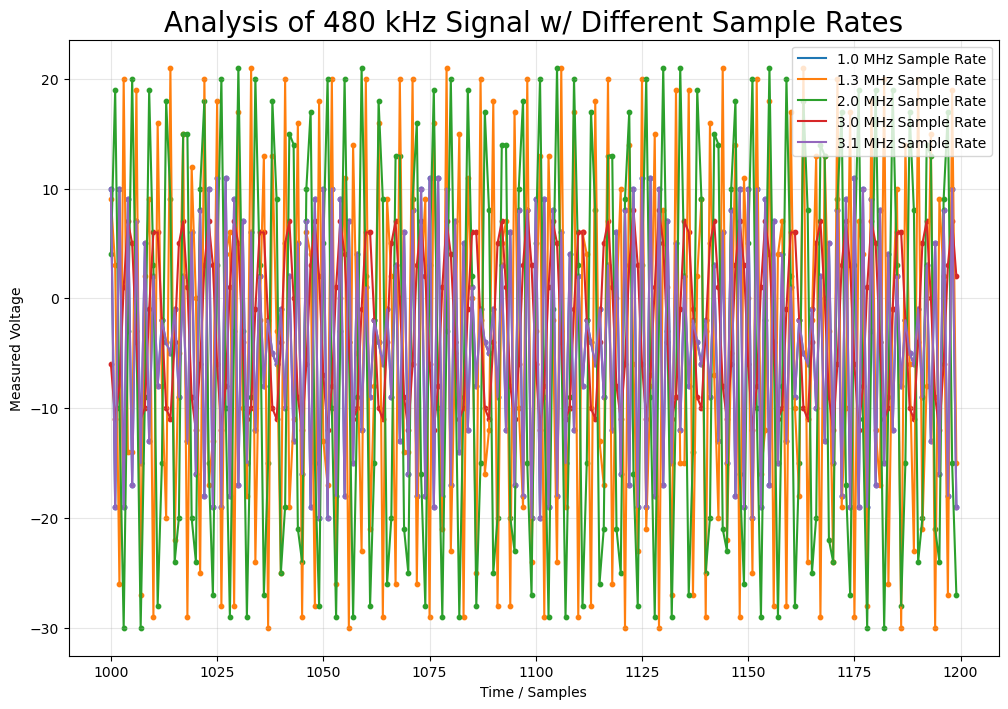

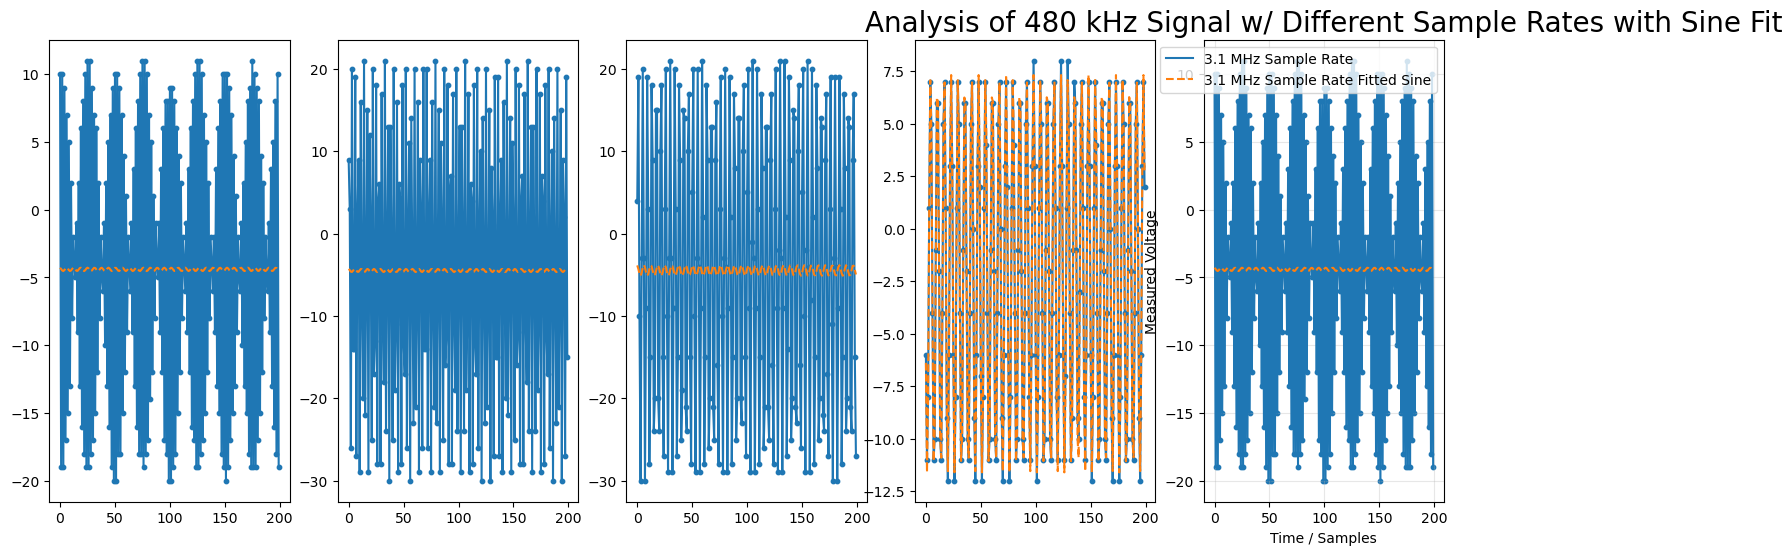

In [119]:
#datasets = [data_480_900, data_480_950, data_480_1000, data_480_1300, data_480_2000, data_480_3000, data_480_3100]
#labels = ["0.9 MHz Sample Rate", "0.95 MHz Sample Rate", "1.0 MHz Sample Rate", "1.3 MHz Sample Rate", "2.0 MHz Sample Rate", "3.0 MHz Sample Rate", "3.1 MHz Sample Rate"]
#signal = "480 kHz"

datasets = [data_480_1000, data_480_1300, data_480_2000, data_480_3000, data_480_3100]
labels = ["1.0 MHz Sample Rate", "1.3 MHz Sample Rate", "2.0 MHz Sample Rate", "3.0 MHz Sample Rate", "3.1 MHz Sample Rate"]
signal = "480 kHz"

graphAllTimeData(datasets, labels, signal)
graphOverlayTimeData(datasets, labels, signal)
graphAllTimeDataWithFit(datasets, labels, signal)